 ##  0. Importing Packages

In [1]:
cd C:\Users\john9

C:\Users\john9


In [2]:
%matplotlib inline
import warnings
import time
import pandas as pd
import numpy as np
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50, 'display.max_rows', 200)


import matplotlib.pylab as plt

%run import_modules.py  

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

#tf.logging.set_verbosity(tf.logging.ERROR)
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#from tensorflow import set_random_seed         ##tf.random.set_seed(1)
import keras 
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot
from keras.callbacks import EarlyStopping

from scipy.stats.mstats import gmean

Using TensorFlow backend.


In [3]:
cd C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Data

C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Data


## 1. Reading Data

In [5]:
myseed = 56 #anchoring

#to_remove = ['휴면(이탈)여부','화장품품목구매여부', '디자이너품목구매여부', '시티웨어품목구매여부', #Target Features to remove
             #'구매상품종류1_cat', '내점일수_cat', '총구매액_cat','최대구매액_cat','내점당구매액_cat','행사상품구매총액_cat']

X_train = pd.read_csv('X_train_after_preprocessing.csv') #F4
X_test = pd.read_csv('X_test_after_preprocessing.csv')

y_train = pd.read_csv('y_train.csv').gender # y_train
IDtest = pd.read_csv('X_test.csv', encoding='cp949').cust_id.unique() #target ID for prediction

X_train.shape, X_test.shape

((3500, 61), (2482, 61))

## 3. Build Models

## try 1
- 간단한 모델로 성능 파악
- kernel_initializer: `he_normal`
- kernel_regularizer: `l2(0.01)`

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                3776      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 17        
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________
Train on 2800 samples, validate on 700 samples
Epoch 1/100
2800/2800 [==============================] - 2s 610us/step 

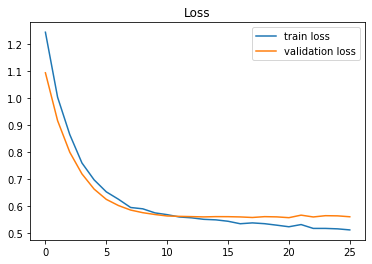

In [12]:
# Define the number of features
max_features = X_train.shape[1]

# Define the Model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(max_features,), kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.summary()

# Train the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',tf.keras.metrics.AUC()])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_split=0.2, callbacks=callbacks)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

<font color='tomato'><font color="#CC3D3D"><p>
## try 3
- units을 그대로 64로 두고 Add()를 사용
- optimizer를 Adagrad로 변경

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_166 (Dense)               (None, 64)           3968        input_34[0][0]                   
__________________________________________________________________________________________________
dropout_67 (Dropout)            (None, 64)           0           dense_166[0][0]                  
__________________________________________________________________________________________________
dense_167 (Dense)               (None, 64)           4160        dropout_67[0][0]                 
___________________________________________________________________________________________

2800/2800 [==============================] - 0s 24us/step - loss: 0.5659 - acc: 0.7168 - auc_33: 0.7775 - val_loss: 0.5483 - val_acc: 0.7443 - val_auc_33: 0.7777
Epoch 33/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5672 - acc: 0.7200 - auc_33: 0.7778 - val_loss: 0.5477 - val_acc: 0.7443 - val_auc_33: 0.7778
Epoch 34/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5641 - acc: 0.7157 - auc_33: 0.7780 - val_loss: 0.5472 - val_acc: 0.7457 - val_auc_33: 0.7780
Epoch 35/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5643 - acc: 0.7179 - auc_33: 0.7781 - val_loss: 0.5472 - val_acc: 0.7386 - val_auc_33: 0.7782
Epoch 36/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5622 - acc: 0.7161 - auc_33: 0.7782 - val_loss: 0.5458 - val_acc: 0.7471 - val_auc_33: 0.7784
Epoch 37/1000
2800/2800 [==============================] - 0s 26us/step - loss: 0.5610 - acc: 0.7221 - auc_33: 0.7783 - val_loss: 0.54

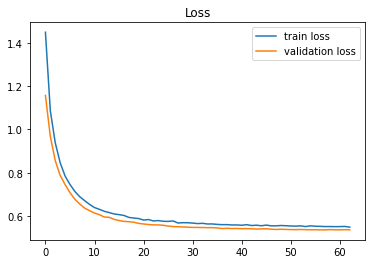

AUC 0.7971879663812741


 10%|████████▎                                                                          | 1/10 [00:06<00:59,  6.63s/it]

Model: "model_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_171 (Dense)               (None, 64)           3968        input_35[0][0]                   
__________________________________________________________________________________________________
dropout_69 (Dropout)            (None, 64)           0           dense_171[0][0]                  
__________________________________________________________________________________________________
dense_172 (Dense)               (None, 64)           4160        dropout_69[0][0]                 
___________________________________________________________________________________________

2800/2800 [==============================] - 0s 23us/step - loss: 0.5687 - acc: 0.7225 - auc_34: 0.7759 - val_loss: 0.5758 - val_acc: 0.7171 - val_auc_34: 0.7759
Epoch 33/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5666 - acc: 0.7168 - auc_34: 0.7759 - val_loss: 0.5735 - val_acc: 0.7286 - val_auc_34: 0.7760
Epoch 34/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5667 - acc: 0.7254 - auc_34: 0.7761 - val_loss: 0.5719 - val_acc: 0.7300 - val_auc_34: 0.7762
Epoch 35/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5636 - acc: 0.7214 - auc_34: 0.7764 - val_loss: 0.5712 - val_acc: 0.7214 - val_auc_34: 0.7764
Epoch 36/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5602 - acc: 0.7221 - auc_34: 0.7765 - val_loss: 0.5706 - val_acc: 0.7229 - val_auc_34: 0.7766
Epoch 37/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5608 - acc: 0.7207 - auc_34: 0.7768 - val_loss: 0.56

2800/2800 [==============================] - 0s 22us/step - loss: 0.5459 - acc: 0.7193 - auc_34: 0.7801 - val_loss: 0.5582 - val_acc: 0.7214 - val_auc_34: 0.7801
Epoch 79/1000
2800/2800 [==============================] - 0s 22us/step - loss: 0.5442 - acc: 0.7171 - auc_34: 0.7802 - val_loss: 0.5588 - val_acc: 0.7143 - val_auc_34: 0.7802
Epoch 80/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5435 - acc: 0.7243 - auc_34: 0.7802 - val_loss: 0.5590 - val_acc: 0.7171 - val_auc_34: 0.7802
Epoch 81/1000
2800/2800 [==============================] - 0s 22us/step - loss: 0.5453 - acc: 0.7146 - auc_34: 0.7802 - val_loss: 0.5596 - val_acc: 0.7100 - val_auc_34: 0.7803
Epoch 82/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5421 - acc: 0.7293 - auc_34: 0.7803 - val_loss: 0.5582 - val_acc: 0.7114 - val_auc_34: 0.7803


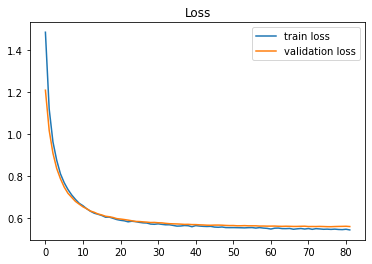

 20%|████████████████▌                                                                  | 2/10 [00:14<00:56,  7.07s/it]

AUC 0.7792506459948321
Model: "model_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_176 (Dense)               (None, 64)           3968        input_36[0][0]                   
__________________________________________________________________________________________________
dropout_71 (Dropout)            (None, 64)           0           dense_176[0][0]                  
__________________________________________________________________________________________________
dense_177 (Dense)               (None, 64)           4160        dropout_71[0][0]                 
____________________________________________________________________

2800/2800 [==============================] - 0s 21us/step - loss: 0.5627 - acc: 0.7182 - auc_35: 0.7791 - val_loss: 0.5884 - val_acc: 0.7057 - val_auc_35: 0.7792
Epoch 33/1000
2800/2800 [==============================] - 0s 23us/step - loss: 0.5627 - acc: 0.7257 - auc_35: 0.7793 - val_loss: 0.5892 - val_acc: 0.7071 - val_auc_35: 0.7793
Epoch 34/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5606 - acc: 0.7304 - auc_35: 0.7796 - val_loss: 0.5893 - val_acc: 0.7143 - val_auc_35: 0.7794
Epoch 35/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5599 - acc: 0.7282 - auc_35: 0.7796 - val_loss: 0.5865 - val_acc: 0.7143 - val_auc_35: 0.7795
Epoch 36/1000
2800/2800 [==============================] - 0s 20us/step - loss: 0.5589 - acc: 0.7286 - auc_35: 0.7797 - val_loss: 0.5875 - val_acc: 0.7071 - val_auc_35: 0.7796
Epoch 37/1000
2800/2800 [==============================] - 0s 19us/step - loss: 0.5557 - acc: 0.7271 - auc_35: 0.7798 - val_loss: 0.58

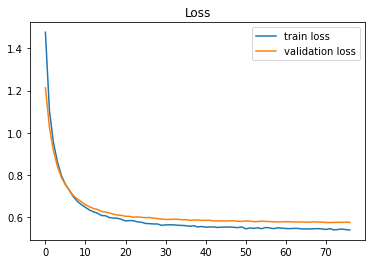

AUC 0.7631670675171668


 30%|████████████████████████▉                                                          | 3/10 [00:22<00:50,  7.19s/it]

Model: "model_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_181 (Dense)               (None, 64)           3968        input_37[0][0]                   
__________________________________________________________________________________________________
dropout_73 (Dropout)            (None, 64)           0           dense_181[0][0]                  
__________________________________________________________________________________________________
dense_182 (Dense)               (None, 64)           4160        dropout_73[0][0]                 
___________________________________________________________________________________________

2800/2800 [==============================] - 0s 21us/step - loss: 0.5577 - acc: 0.7271 - auc_36: 0.7783 - val_loss: 0.6103 - val_acc: 0.7100 - val_auc_36: 0.7783
Epoch 33/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5561 - acc: 0.7329 - auc_36: 0.7785 - val_loss: 0.6062 - val_acc: 0.7114 - val_auc_36: 0.7785
Epoch 34/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5596 - acc: 0.7254 - auc_36: 0.7787 - val_loss: 0.6043 - val_acc: 0.7129 - val_auc_36: 0.7786
Epoch 35/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5535 - acc: 0.7239 - auc_36: 0.7789 - val_loss: 0.6039 - val_acc: 0.7157 - val_auc_36: 0.7789
Epoch 36/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5514 - acc: 0.7318 - auc_36: 0.7790 - val_loss: 0.6032 - val_acc: 0.7114 - val_auc_36: 0.7791
Epoch 37/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5556 - acc: 0.7293 - auc_36: 0.7792 - val_loss: 0.60

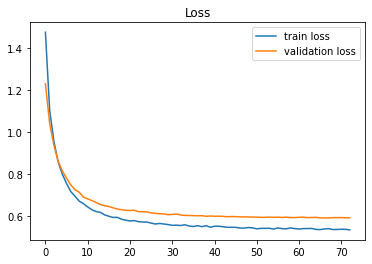

AUC 0.7471264367816092


 40%|█████████████████████████████████▏                                                 | 4/10 [00:29<00:43,  7.22s/it]

Model: "model_38"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_186 (Dense)               (None, 64)           3968        input_38[0][0]                   
__________________________________________________________________________________________________
dropout_75 (Dropout)            (None, 64)           0           dense_186[0][0]                  
__________________________________________________________________________________________________
dense_187 (Dense)               (None, 64)           4160        dropout_75[0][0]                 
___________________________________________________________________________________________

2800/2800 [==============================] - 0s 21us/step - loss: 0.5526 - acc: 0.7286 - auc_37: 0.7788 - val_loss: 0.5861 - val_acc: 0.6871 - val_auc_37: 0.7788
Epoch 33/1000
2800/2800 [==============================] - 0s 20us/step - loss: 0.5571 - acc: 0.7279 - auc_37: 0.7788 - val_loss: 0.5848 - val_acc: 0.6871 - val_auc_37: 0.7789
Epoch 34/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5525 - acc: 0.7318 - auc_37: 0.7789 - val_loss: 0.5853 - val_acc: 0.6871 - val_auc_37: 0.7790
Epoch 35/1000
2800/2800 [==============================] - 0s 22us/step - loss: 0.5511 - acc: 0.7264 - auc_37: 0.7792 - val_loss: 0.5840 - val_acc: 0.6900 - val_auc_37: 0.7791
Epoch 36/1000
2800/2800 [==============================] - 0s 20us/step - loss: 0.5519 - acc: 0.7350 - auc_37: 0.7792 - val_loss: 0.5837 - val_acc: 0.6871 - val_auc_37: 0.7793
Epoch 37/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5496 - acc: 0.7371 - auc_37: 0.7793 - val_loss: 0.58

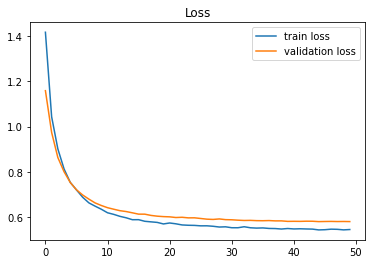

AUC 0.7493026376187282


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:34<00:32,  6.58s/it]

Model: "model_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_191 (Dense)               (None, 64)           3968        input_39[0][0]                   
__________________________________________________________________________________________________
dropout_77 (Dropout)            (None, 64)           0           dense_191[0][0]                  
__________________________________________________________________________________________________
dense_192 (Dense)               (None, 64)           4160        dropout_77[0][0]                 
___________________________________________________________________________________________

2800/2800 [==============================] - 0s 22us/step - loss: 0.5678 - acc: 0.7271 - auc_38: 0.7778 - val_loss: 0.5706 - val_acc: 0.7043 - val_auc_38: 0.7779
Epoch 33/1000
2800/2800 [==============================] - 0s 20us/step - loss: 0.5629 - acc: 0.7293 - auc_38: 0.7779 - val_loss: 0.5699 - val_acc: 0.7043 - val_auc_38: 0.7781
Epoch 34/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5643 - acc: 0.7243 - auc_38: 0.7782 - val_loss: 0.5691 - val_acc: 0.7043 - val_auc_38: 0.7783
Epoch 35/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5605 - acc: 0.7329 - auc_38: 0.7785 - val_loss: 0.5684 - val_acc: 0.7071 - val_auc_38: 0.7785
Epoch 36/1000
2800/2800 [==============================] - 0s 22us/step - loss: 0.5600 - acc: 0.7282 - auc_38: 0.7787 - val_loss: 0.5678 - val_acc: 0.7000 - val_auc_38: 0.7787
Epoch 37/1000
2800/2800 [==============================] - 0s 20us/step - loss: 0.5586 - acc: 0.7286 - auc_38: 0.7787 - val_loss: 0.56

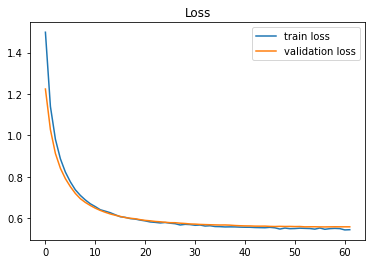

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:40<00:25,  6.46s/it]

AUC 0.7721853146853147
Model: "model_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_196 (Dense)               (None, 64)           3968        input_40[0][0]                   
__________________________________________________________________________________________________
dropout_79 (Dropout)            (None, 64)           0           dense_196[0][0]                  
__________________________________________________________________________________________________
dense_197 (Dense)               (None, 64)           4160        dropout_79[0][0]                 
____________________________________________________________________

2800/2800 [==============================] - 0s 26us/step - loss: 0.5546 - acc: 0.7304 - auc_39: 0.7786 - val_loss: 0.5924 - val_acc: 0.6800 - val_auc_39: 0.7786
Epoch 33/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5558 - acc: 0.7286 - auc_39: 0.7787 - val_loss: 0.5927 - val_acc: 0.6786 - val_auc_39: 0.7787
Epoch 34/1000
2800/2800 [==============================] - 0s 26us/step - loss: 0.5556 - acc: 0.7275 - auc_39: 0.7788 - val_loss: 0.5908 - val_acc: 0.6857 - val_auc_39: 0.7788
Epoch 35/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5515 - acc: 0.7304 - auc_39: 0.7789 - val_loss: 0.5908 - val_acc: 0.6814 - val_auc_39: 0.7789
Epoch 36/1000
2800/2800 [==============================] - 0s 30us/step - loss: 0.5508 - acc: 0.7364 - auc_39: 0.7791 - val_loss: 0.5923 - val_acc: 0.6714 - val_auc_39: 0.7791
Epoch 37/1000
2800/2800 [==============================] - 0s 28us/step - loss: 0.5522 - acc: 0.7339 - auc_39: 0.7792 - val_loss: 0.59

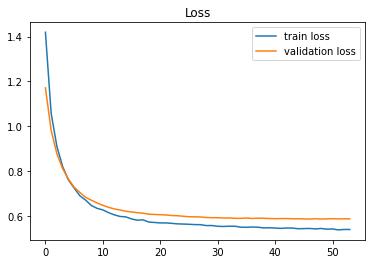

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:47<00:19,  6.43s/it]

AUC 0.7513743815283123
Model: "model_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_201 (Dense)               (None, 64)           3968        input_41[0][0]                   
__________________________________________________________________________________________________
dropout_81 (Dropout)            (None, 64)           0           dense_201[0][0]                  
__________________________________________________________________________________________________
dense_202 (Dense)               (None, 64)           4160        dropout_81[0][0]                 
____________________________________________________________________

2800/2800 [==============================] - 0s 20us/step - loss: 0.5595 - acc: 0.7239 - auc_40: 0.7780 - val_loss: 0.5767 - val_acc: 0.7143 - val_auc_40: 0.7781
Epoch 33/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5622 - acc: 0.7279 - auc_40: 0.7782 - val_loss: 0.5755 - val_acc: 0.7200 - val_auc_40: 0.7782
Epoch 34/1000
2800/2800 [==============================] - 0s 22us/step - loss: 0.5565 - acc: 0.7318 - auc_40: 0.7784 - val_loss: 0.5741 - val_acc: 0.7143 - val_auc_40: 0.7784
Epoch 35/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5589 - acc: 0.7293 - auc_40: 0.7785 - val_loss: 0.5746 - val_acc: 0.7143 - val_auc_40: 0.7786
Epoch 36/1000
2800/2800 [==============================] - 0s 22us/step - loss: 0.5579 - acc: 0.7271 - auc_40: 0.7786 - val_loss: 0.5731 - val_acc: 0.7143 - val_auc_40: 0.7787
Epoch 37/1000
2800/2800 [==============================] - 0s 26us/step - loss: 0.5576 - acc: 0.7204 - auc_40: 0.7787 - val_loss: 0.57

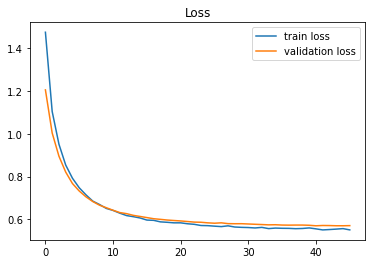

AUC 0.7655733333333332


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:52<00:12,  6.16s/it]

Model: "model_42"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_206 (Dense)               (None, 64)           3968        input_42[0][0]                   
__________________________________________________________________________________________________
dropout_83 (Dropout)            (None, 64)           0           dense_206[0][0]                  
__________________________________________________________________________________________________
dense_207 (Dense)               (None, 64)           4160        dropout_83[0][0]                 
___________________________________________________________________________________________

2800/2800 [==============================] - 0s 24us/step - loss: 0.5681 - acc: 0.7207 - auc_41: 0.7775 - val_loss: 0.5546 - val_acc: 0.7229 - val_auc_41: 0.7776
Epoch 33/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5653 - acc: 0.7175 - auc_41: 0.7780 - val_loss: 0.5530 - val_acc: 0.7343 - val_auc_41: 0.7778
Epoch 34/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5659 - acc: 0.7171 - auc_41: 0.7780 - val_loss: 0.5521 - val_acc: 0.7171 - val_auc_41: 0.7780
Epoch 35/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5621 - acc: 0.7261 - auc_41: 0.7781 - val_loss: 0.5527 - val_acc: 0.7214 - val_auc_41: 0.7782
Epoch 36/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5647 - acc: 0.7268 - auc_41: 0.7783 - val_loss: 0.5501 - val_acc: 0.7200 - val_auc_41: 0.7784
Epoch 37/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5654 - acc: 0.7207 - auc_41: 0.7785 - val_loss: 0.55

2800/2800 [==============================] - 0s 19us/step - loss: 0.5482 - acc: 0.7243 - auc_41: 0.7820 - val_loss: 0.5376 - val_acc: 0.7186 - val_auc_41: 0.7820
Epoch 79/1000
2800/2800 [==============================] - 0s 19us/step - loss: 0.5482 - acc: 0.7250 - auc_41: 0.7820 - val_loss: 0.5371 - val_acc: 0.7186 - val_auc_41: 0.7820
Epoch 80/1000
2800/2800 [==============================] - 0s 21us/step - loss: 0.5463 - acc: 0.7218 - auc_41: 0.7821 - val_loss: 0.5371 - val_acc: 0.7171 - val_auc_41: 0.7821
Epoch 81/1000
2800/2800 [==============================] - 0s 19us/step - loss: 0.5475 - acc: 0.7221 - auc_41: 0.7821 - val_loss: 0.5373 - val_acc: 0.7186 - val_auc_41: 0.7821
Epoch 82/1000
2800/2800 [==============================] - 0s 19us/step - loss: 0.5467 - acc: 0.7257 - auc_41: 0.7821 - val_loss: 0.5378 - val_acc: 0.7214 - val_auc_41: 0.7822
Epoch 83/1000
2800/2800 [==============================] - 0s 19us/step - loss: 0.5448 - acc: 0.7296 - auc_41: 0.7822 - val_loss: 0.53

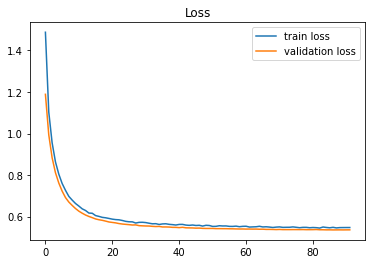

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:01<00:06,  6.92s/it]

AUC 0.7883637583418666
Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           (None, 61)           0                                            
__________________________________________________________________________________________________
dense_211 (Dense)               (None, 64)           3968        input_43[0][0]                   
__________________________________________________________________________________________________
dropout_85 (Dropout)            (None, 64)           0           dense_211[0][0]                  
__________________________________________________________________________________________________
dense_212 (Dense)               (None, 64)           4160        dropout_85[0][0]                 
____________________________________________________________________

2800/2800 [==============================] - 0s 22us/step - loss: 0.5718 - acc: 0.7182 - auc_42: 0.7754 - val_loss: 0.5439 - val_acc: 0.7429 - val_auc_42: 0.7756
Epoch 33/1000
2800/2800 [==============================] - 0s 23us/step - loss: 0.5691 - acc: 0.7129 - auc_42: 0.7757 - val_loss: 0.5430 - val_acc: 0.7414 - val_auc_42: 0.7758
Epoch 34/1000
2800/2800 [==============================] - 0s 23us/step - loss: 0.5680 - acc: 0.7121 - auc_42: 0.7760 - val_loss: 0.5434 - val_acc: 0.7457 - val_auc_42: 0.7761
Epoch 35/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5669 - acc: 0.7114 - auc_42: 0.7762 - val_loss: 0.5420 - val_acc: 0.7443 - val_auc_42: 0.7763
Epoch 36/1000
2800/2800 [==============================] - 0s 24us/step - loss: 0.5671 - acc: 0.7161 - auc_42: 0.7764 - val_loss: 0.5406 - val_acc: 0.7414 - val_auc_42: 0.7765
Epoch 37/1000
2800/2800 [==============================] - 0s 25us/step - loss: 0.5697 - acc: 0.7100 - auc_42: 0.7765 - val_loss: 0.53

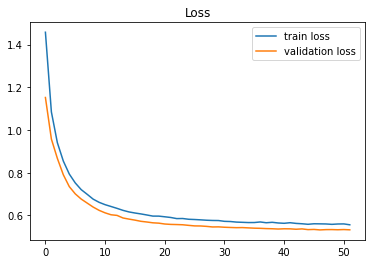

AUC 0.801781737193764


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.71s/it]


In [11]:
# Define the number of features
max_features = X_train.shape[1]

# Define the Model architecture
N = 10
p = 3.5
preds = []
aucs = []

for i in tqdm(range(N)):    
    SEED = np.random.randint(1, 10000)              
    random.seed(SEED)       
    np.random.seed(SEED)     
    if tf.__version__[0] < '2':  
        tf.set_random_seed(SEED)
    else:
        tf.random.set_seed(SEED)

    # Define the Model architecture
    input = Input(shape=(X_train.shape[1],)) 
    x = Dense(64, activation='elu', input_shape=(max_features,), kernel_regularizer=l2(0.01), kernel_initializer='he_normal')(input) 
    x = Dropout(0.1)(x)
    x1 = Dense(64)(x)
    x = Add()([x1, x])
    x = Dense(16, activation='elu', kernel_initializer='he_normal')(x)
    x = Dropout(0.1)(x)
    x1 = Dense(16)(x)
    x = Add()([x1, x])
    out = Dense(1, activation='sigmoid')(x)

    model3 = Model(input, out)
    model3.summary()

    # Train the Model
    model3.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['acc',tf.keras.metrics.AUC()])

    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)

    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=5),
                 keras.callbacks.ModelCheckpoint(filepath='best_model4.h5',
                                                 monitor='val_loss',
                                                 save_best_only=True)]

    history = model3.fit(train_x, train_y, epochs=1000, batch_size=64, 
                        validation_data=(valid_x, valid_y), callbacks=callbacks)

    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    auc = roc_auc_score(valid_y, model3.predict(valid_x).flatten())
    aucs.append(auc)
    print('AUC', auc)
    preds.append(model3.predict(X_test).flatten())     

In [10]:
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))


Validation Summary:
2    0.809063
9    0.792989
5    0.785405
1    0.784007
7    0.771244
6    0.764276
0    0.762650
8    0.760202
4    0.750989
3    0.749492
dtype: float64
mean=0.77303, std=0.019


In [8]:
cd C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Submission

C:\Users\john9\Downloads\3학년 2학기\머신러닝\과제\5차\Submission


In [38]:
# Power mean ensemble
THRESHOLD = 0.79  # Use only models whose AUC exceeds this value

pred = 0
n = 0
for i in range(N):
    if aucs.iloc[i] > THRESHOLD:
        pred = pred + preds[i]**p 
        n += 1
pred = pred / n    
pred = pred**(1/p)

# Make a submission file
t = pd.Timestamp.now()
fname = f"DNN_F4_p{p}n{n}_submit_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'DNN_F4_p3.5n5_submit_06132310.csv' is ready to submit.


In [9]:
# pred = model.predict(X_test)[:,0]
# t = pd.Timestamp.now()
# fname = f"NN_submission_F4_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
# submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
# submissions.to_csv(fname, index=False)
# print(f"'{fname}' is ready to submit.")

'NN_submission_F4_06101900.csv' is ready to submit.
